In [1]:
# Trying with multiple linear regression

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Fetching the data

data = pd.read_csv('Fish.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
112,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640
14,Bream,600.0,29.4,32.0,37.2,14.9544,5.1708
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
67,Parkki,170.0,19.0,20.7,23.2,9.3960,3.4104
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659


In [3]:
# Making Columns more readable

df.rename(columns= {'Length1':'Ver_Length', 'Length2':'Dia_Breadth', 'Length3':'Cross_Width'}, inplace=True)
df.head()

,Species,Weight,Ver_Length,Dia_Breadth,Cross_Width,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Chceking if there are any NaN values

print(str("NaN values present : "), df.isnull().values.any())

NaN values present :  False


In [5]:
# Find out the number of fish per species

species = df['Species'].value_counts()

species = pd.DataFrame(species)
species.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


In [6]:
species_weights = df[['Species','Weight']]
species_weights = pd.DataFrame(species_weights)
species_weights = species_weights.groupby(["Species"]).mean()
species_weights.head()

,Weight
Species,
Bream,617.828571
Parkki,154.818182
Perch,382.239286
Pike,718.705882
Roach,152.050000


In [7]:
df.corr()

,Weight,Ver_Length,Dia_Breadth,Cross_Width,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Ver_Length,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Dia_Breadth,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Cross_Width,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


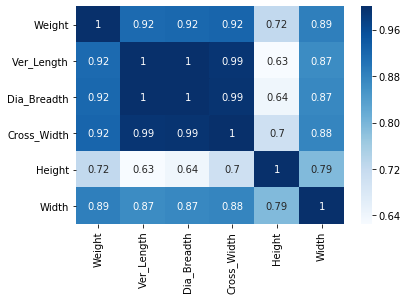

In [8]:
# Heatmap to verify correlation

sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [9]:
# Scatter plot for the correlation

# scatter = sns.pairplot(df, kind='scatter', hue='Species');

In [10]:
df.describe()

,Weight,Ver_Length,Dia_Breadth,Cross_Width,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Removing Outliers 

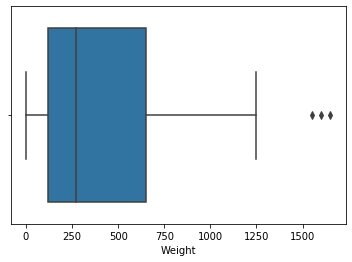

In [11]:
sns.boxplot(x=df['Weight']);

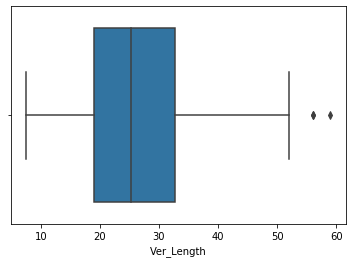

In [12]:
sns.boxplot(x=df['Ver_Length'])

In [13]:
dflv = df['Ver_Length']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: Ver_Length, dtype: float64

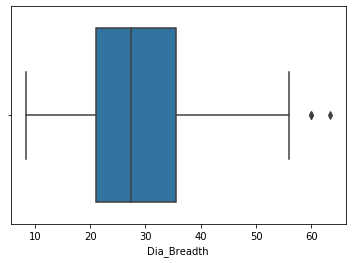

In [14]:
sns.boxplot(x=df['Dia_Breadth']);

In [15]:
dfdia = df['Dia_Breadth']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: Dia_Breadth, dtype: float64

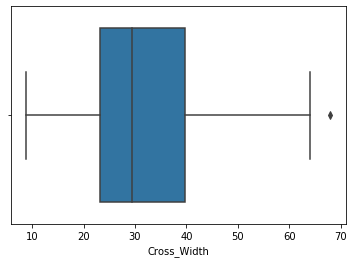

In [16]:
sns.boxplot(x=df['Cross_Width']);

In [17]:
dfcro = df['Cross_Width']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: Cross_Width, dtype: float64

In [18]:
df[142:145]

,Species,Weight,Ver_Length,Dia_Breadth,Cross_Width,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [19]:
df1 = df.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Ver_Length,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Dia_Breadth,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Cross_Width,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [20]:
X = df1.iloc[:,2:7]
y = df1['Weight']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [23]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print('Model coefficients: ', reg.coef_)

Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [25]:
print('y = ' + str('%d' % reg.coef_[0]) + '*X ' + '- ' + str('%d' % abs(reg.coef_[1])) + '*X^2 ' + '- ' + str('%d' % abs(reg.coef_[2])) + '*X^3 + ' + str('%d' % reg.coef_[3]) + '*X^4 + ' + str('%d' % reg.coef_[4]) + '*X^5 ' + '- ' + str('%d' % abs(reg.intercept_)))

y = 89*X - 32*X^2 - 37*X^3 + 33*X^4 + 60*X^5 - 441


In [26]:
y_pred = reg.predict(X_train)

In [27]:
y_pred[0:5]

array([202.90452767, 885.91891353, 942.33274059, 702.05036955,
       942.59702197])

In [28]:
r2_score(y_train, y_pred)

0.9116039087262157

In [29]:
y_pred_test = reg.predict(X_test)

In [30]:
y_pred_test

array([ 746.03461547,   44.69857741,  282.2872662 ,  777.20820933,
        -74.80228919,  159.71794772,  569.63773532,  651.09761494,
        349.70791715, -163.68407419, -160.7129609 ,   92.2355465 ,
        211.23403725,  181.91450982,  165.03422979,  445.30901505,
        860.29106155,  589.45595321,  626.12814176,  791.62920091,
        288.03559932, -184.53021398, -209.11977418,  252.49273758,
        187.80124711,  310.23118893,  169.17629085,  130.16735576,
        764.04634258,  206.46227307,  378.04381705,  666.43412998])

In [31]:
print("The final score of the model on test set is : " + str(r2_score(y_test,y_pred_test)))

The final score of the model on test set is : 0.8671964388742471
